# XGBoost

In [1]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [3]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [4]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
exploratory_depths =[2, 3, 4, 5, 6]
exploratory_estimators = [50, 100, 200, 400, 500]
exploratory_learn_rate = [0.05, 0.1, 0.5, 0.7]

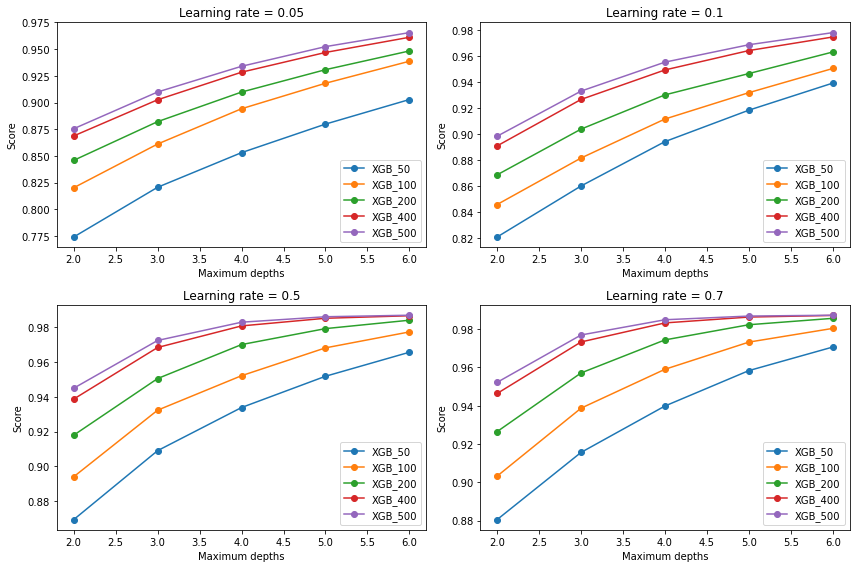

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [XGBRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='XGB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 0].set_xlabel('Maximum depths')
axs[0, 0].set_ylabel('Score')
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[0, 1].set_xlabel('Maximum depths')
axs[0, 1].set_ylabel('Score')
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 0].set_xlabel('Maximum depths')
axs[1, 0].set_ylabel('Score')
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()
axs[1, 1].set_xlabel('Maximum depths')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [10]:
max_depth = [1, 2, 3, 4]
n_estimators = [25, 50, 75, 100, 150, 200, 250, 300, 350, 400]
learn_rate = [0.05, 0.1, 0.2, 0.5, 0.7]

In [11]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(XGBRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('XGB_'+str(n)+'_'+str(d)+'_'+str(l))

In [12]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/superconductivity/xgboost.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_25_1_0.05,0.657980,23.857784,24.383162,2.202125
XGB_25_1_0.1,0.726027,18.709750,19.195538,2.596444
XGB_25_1_0.2,0.675930,16.524878,16.991909,2.826229
XGB_25_1_0.5,0.722080,15.171854,15.644108,3.112698
XGB_25_1_0.7,0.599915,15.572481,15.920835,2.236982
...,...,...,...,...
XGB_400_4_0.05,14.681967,9.155235,10.723970,17.134850
XGB_400_4_0.1,15.096250,7.722095,10.079010,30.521712
XGB_400_4_0.2,14.925736,6.249369,9.747024,55.968127
XGB_400_4_0.5,14.877347,4.731598,10.164835,114.828810


In [13]:
metrics.sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
XGB_400_4_0.2,14.925736,6.249369,9.747024,55.968127
XGB_350_4_0.2,12.811741,6.497674,9.768228,50.334213
XGB_300_4_0.2,11.934621,6.842864,9.809603,43.355229
XGB_250_4_0.2,10.198434,7.221325,9.901838,37.119413
XGB_200_4_0.2,8.440310,7.717796,10.035378,30.029076
...,...,...,...,...
XGB_50_1_0.05,0.903049,18.832673,19.303914,2.502251
XGB_25_4_0.05,1.242494,19.031668,19.927028,4.704579
XGB_25_3_0.05,1.154951,20.112040,20.880727,3.822025
XGB_25_2_0.05,0.940088,21.658441,22.361666,3.246884


Let's keep on with the model **XGB_400_4_0.2**

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [6]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [26]:
model = XGBRegressor(n_estimators=400, max_depth=4, learning_rate=0.2).fit(X_retrain, y_retrain)

In [27]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 9.735


In [28]:
dump(model, '../../../data/model_output/models/superconductivity/best_xgboost.joblib')

['best_xgboost.joblib']

In [29]:
with open('../../../data/model_output/metrics/superconductivity/final_RMSE.txt', 'a') as f:
    f.write('\nXGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_12848/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


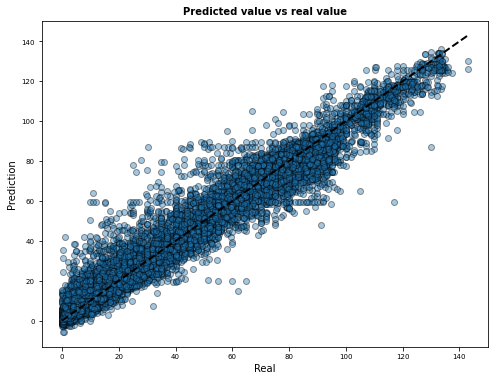

In [30]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/superconductivity/best_xgboost.joblib')

train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [10]:
import time 
time1 = time.time()
XGBRegressor(n_estimators=400, max_depth=4, learning_rate=0.2).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

with open('../../../data/model_output/metrics/superconductivity/final_metrics.txt', 'a') as f:
     f.write(f'\nXGB; {time2}; {rmse_train}; {rmse_test}')